# Discovering interpretable features


## Non-negative matrix factorization (NMF)


NMF, like PCA, is a dimension reduction technique but interpretable and easy to explain. The data should be non-negative. Decomposing samples as sums of their parts. NMF decomposes documents as combinations of common themes.

TF = frequency of word in document.
idf = weigthing sceme that reduces the influence of frequent words like "the".

### NMF applied to Wikipedia articles


In [44]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF

df = pd.read_csv("wikipedia-vectors.csv", index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

model = NMF(n_components = 6)
model.fit(articles)
nmf_features = model.transform(articles)
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4

In [28]:
df = pd.DataFrame(nmf_features, index=titles)
print(df.loc["Anne Hathaway"])
print(df.loc["Denzel Washington"])

0    0.003845
1    0.000000
2    0.000000
3    0.575575
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005602
2    0.000000
3    0.422281
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component.


## NMF learns interpretable parts

### NMF learns topics of documents

when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics.

In [37]:
f = open("wikipedia-vocabulary-utf8.txt","r")
words = (f.read()).split("\n")
f.close()
components_df = pd.DataFrame(model.components_, columns=words)
print(components_df.shape)
component = components_df.iloc[3]
print(component.nlargest())

(6, 13125)
film       0.627883
award      0.253134
starred    0.245287
role       0.211453
actress    0.186400
Name: 3, dtype: float64


The articles about Anne Hathaway and Denzel Washington have in common.

### Explore the LED digits dataset 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


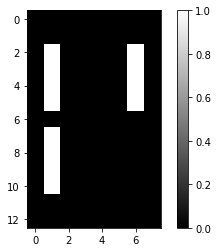

In [65]:
import matplotlib.pyplot as plt

samples = pd.read_csv("digits.csv", header=None)
samples = samples.values
digit = samples[0]
print(digit)
bitmap = digit.reshape(13, 8)
print(bitmap)
plt.imshow(bitmap, cmap="gray",interpolation='nearest')
plt.colorbar()
plt.show()

### NMF learns the parts of images

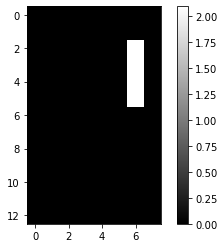

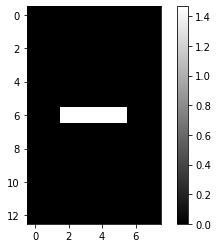

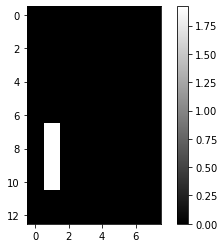

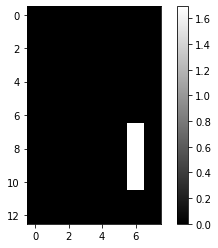

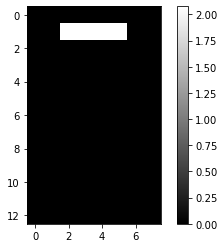

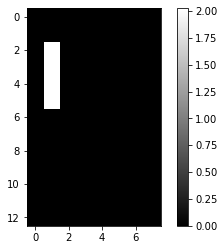

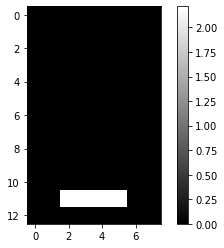

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [68]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

model = NMF(n_components=7)
features = model.fit_transform(samples)
for component in model.components_:
    show_as_image(component)

digit_features = features[0]
print(digit_features)

### PCA doesn't learn parts

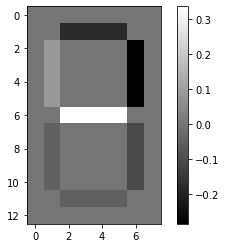

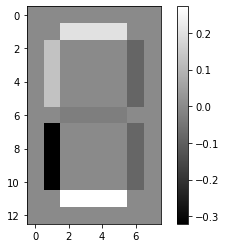

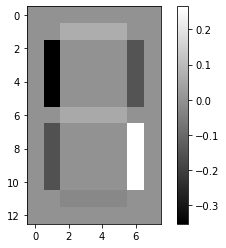

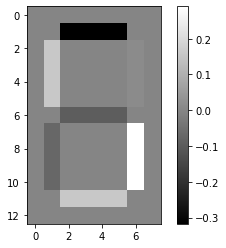

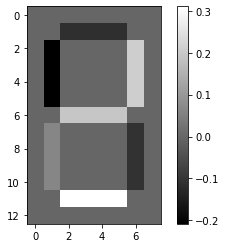

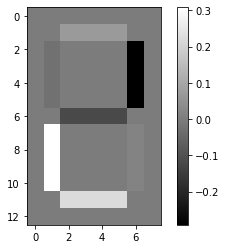

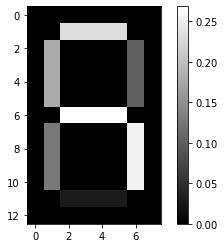

In [71]:
from sklearn.decomposition import PCA
model = PCA(n_components=7)
features = model.fit_transform(samples)
for component in model.components_:
    show_as_image(component)

PCA do not represent meaningful parts of images of LED digits.

### Building recommender systems using NMF

Finding similar articles using cosine similarity.

### Which articles are similar to 'Cristiano Ronaldo'?


In [81]:
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)
article = df.loc["Cristiano Ronaldo"]
similarities = df.dot(article)
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommend musical artists part I


In [161]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
artists = pd.read_csv("artists.csv", header=None)
df = pd.read_csv("scrobbler-small-sample.csv")
df = df.pivot_table("playcount","artist_offset", "user_offset" ).fillna(0)
samples = csr_matrix(df)

scaler = MaxAbsScaler()
nmf = NMF(n_components=20)
normalizer = Normalizer()
pipeline = make_pipeline(scaler, nmf, normalizer)
norm_features = pipeline.fit_transform(samples)

### Recommend musical artists part II


In [191]:
df = pd.DataFrame(norm_features, index=list(artists.iloc[:,0]))
artist = df.loc["Bruce Springsteen"]
similarities = df.dot(artist)
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.956115
Van Morrison         0.872890
Leonard Cohen        0.866157
Bob Dylan            0.859287
dtype: float64
